In this notebook, we explore the dataset given for the challenge. 

In [61]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [81]:
import pandas as pd
# set precision for pandas
pd.set_option('display.precision', 3)
pd.options.display.max_rows = 2000
pd.options.display.max_columns = 100

import numpy as np

# imports to set up plotting
import matplotlib.pyplot as plt
import seaborn as sns
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

In [63]:
# load data 
df = pd.read_csv('../data/train.csv')

df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [6]:
# check columns
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [66]:
# describe data
df.info(show_counts = True)
numeric_cols = ["Age", "Annual_Premium", "Vintage"]
categorical_cols = ["Gender", "Driving_License", "Region_Code", "Previously_Insured", "Vehicle_Age", "Vehicle_Damage", "Policy_Sales_Channel"]
binary_cols = ["Gender", "Driving_License", "Previously_Insured", "Vehicle_Damage"]
categorical_cols = [col for col in categorical_cols if col not in binary_cols]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Non-Null Count     Dtype  
---  ------                --------------     -----  
 0   id                    11504798 non-null  int64  
 1   Gender                11504798 non-null  object 
 2   Age                   11504798 non-null  int64  
 3   Driving_License       11504798 non-null  int64  
 4   Region_Code           11504798 non-null  float64
 5   Previously_Insured    11504798 non-null  int64  
 6   Vehicle_Age           11504798 non-null  object 
 7   Vehicle_Damage        11504798 non-null  object 
 8   Annual_Premium        11504798 non-null  float64
 9   Policy_Sales_Channel  11504798 non-null  float64
 10  Vintage               11504798 non-null  int64  
 11  Response              11504798 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB


There are no missing values in the dataset.
Some variables to look at more closely:
 
0. How is the balance of the dataset?
1. Why is Driving_License in int? Is it 1-0 encoded? 
2. Why is Region_Code a float? How many unique values? Does this need to be 1-0 encoded?
3. Vehicle_Age -> categorical encoding (1, 2, 3)
4. Vehicle_Damage -> 1-0 encoding
5. What is the Vintage variable?
6. What is the policy sales channel variable?

#### Balance

In [18]:
df['Response'].value_counts(normalize=True)

Response
0    0.877003
1    0.122997
Name: proportion, dtype: float64

The dataset is heavily imbalanced, with an almost 9:1 ratio of 0 (does not purchase car insurance) to 1. 

#### Driving_License

In [12]:
# check values
df['Driving_License'].value_counts()
df['Driving_License'].value_counts(normalize = True)

Driving_License
1    0.998022
0    0.001978
Name: proportion, dtype: float64

Presumably whether client has a driving license. Who has a car but no driving license? These people most likely do not get insurance... 

In [14]:
pd.crosstab(df['Driving_License'], df['Response'])

Response,0,1
Driving_License,,
0,21502,1255
1,10068237,1413804


In [16]:
pd.crosstab(df['Driving_License'], df['Response'], normalize = 'index')

Response,0,1
Driving_License,,
0,0.944852,0.055148
1,0.876868,0.123132


Half as many people with no driving licence buy insurance than those with driving license 

#### Region_code

In [24]:
df['Region_Code'].value_counts().sort_index()

Region_Code
0.0       59274
1.0       33966
2.0      118097
3.0      246303
4.0       52504
5.0       36832
6.0      181122
7.0       92240
8.0     1021036
9.0       93371
10.0     126081
11.0     278261
12.0      92142
13.0     108838
14.0     134585
15.0     403977
16.0      54905
17.0      74533
18.0     148548
19.0      44197
20.0      58765
21.0     126793
22.0      36932
23.0      54518
24.0      69136
25.0      70556
26.0      71228
27.0      78878
28.0    3451062
29.0     338146
30.0     367307
31.0      58442
32.0      78797
33.0     232387
34.0      48685
35.0     200035
36.0     261946
37.0     158976
38.0      60587
39.0     138068
39.2          1
40.0      35888
41.0     557581
42.0      13693
43.0      75868
44.0      20305
45.0     159292
46.0     578208
47.0     229190
48.0     114230
49.0      50822
50.0     302334
51.0       1880
52.0       3450
Name: count, dtype: int64

52 regions -> most likely federal US states

#### Vintage

In [27]:
df["Vintage"].value_counts().sort_index()

Vintage
10     25723
11     37077
12     21034
13     23862
14     20001
       ...  
295    30348
296    33415
297    33308
298    82529
299    26561
Name: count, Length: 290, dtype: int64

In [12]:
df["Vintage"].describe().apply(lambda x: format(x, '.2f'))

count    11504798.00
mean          163.90
std            79.98
min            10.00
25%            99.00
50%           166.00
75%           232.00
max           299.00
Name: Vintage, dtype: object

In [35]:
# Don't really understande what the vintage variable is. Let's do a crosstab with the target variable
pd.crosstab(df['Vintage'], df['Response'], normalize = 'index')

Response,0,1
Vintage,,
10,0.90,0.10
11,0.76,0.24
12,0.85,0.15
13,0.89,0.11
14,0.89,0.11
...,...,...
295,0.83,0.17
296,0.89,0.11
297,0.91,0.09


doesn't seem to affect Response much. 

#### Policy_Sales_Channel

In [5]:
df["Policy_Sales_Channel"].value_counts().sort_index()

Policy_Sales_Channel
1.0       32960
2.0           6
3.0       14066
4.0       13284
5.0           1
          ...  
157.0    200672
158.0     14540
159.0      1417
160.0    640380
163.0     85299
Name: count, Length: 152, dtype: int64

I can't really think of a meaning for this variable where the ordinal encoding makes sense. I would 1-hot encode this variable as well.

### Dataset description

In [29]:
# we encode the categorical variables
from preprocessing import map_categorical_to_int

df_master = map_categorical_to_int(df)

df_master.head()

,id,Age,Driving_License,Previously_Insured,Vehicle_Age,Annual_Premium,Vintage,Response,Gender_Female,Gender_Male,Vehicle_Damage_No,Vehicle_Damage_Yes,Region_Code_0,Region_Code_1,Region_Code_2,Region_Code_3,Region_Code_4,Region_Code_5,Region_Code_6,Region_Code_7,Region_Code_8,Region_Code_9,Region_Code_10,Region_Code_11,Region_Code_12,Region_Code_13,Region_Code_14,Region_Code_15,Region_Code_16,Region_Code_17,Region_Code_18,Region_Code_19,Region_Code_20,Region_Code_21,Region_Code_22,Region_Code_23,Region_Code_24,Region_Code_25,Region_Code_26,Region_Code_27,Region_Code_28,Region_Code_29,Region_Code_30,Region_Code_31,Region_Code_32,Region_Code_33,Region_Code_34,Region_Code_35,Region_Code_36,Region_Code_37,...,Policy_Sales_Channel_107,Policy_Sales_Channel_108,Policy_Sales_Channel_109,Policy_Sales_Channel_110,Policy_Sales_Channel_111,Policy_Sales_Channel_112,Policy_Sales_Channel_113,Policy_Sales_Channel_114,Policy_Sales_Channel_115,Policy_Sales_Channel_116,Policy_Sales_Channel_117,Policy_Sales_Channel_118,Policy_Sales_Channel_119,Policy_Sales_Channel_120,Policy_Sales_Channel_121,Policy_Sales_Channel_122,Policy_Sales_Channel_123,Policy_Sales_Channel_124,Policy_Sales_Channel_125,Policy_Sales_Channel_126,Policy_Sales_Channel_127,Policy_Sales_Channel_128,Policy_Sales_Channel_129,Policy_Sales_Channel_130,Policy_Sales_Channel_131,Policy_Sales_Channel_132,Policy_Sales_Channel_133,Policy_Sales_Channel_134,Policy_Sales_Channel_135,Policy_Sales_Channel_136,Policy_Sales_Channel_137,Policy_Sales_Channel_138,Policy_Sales_Channel_139,Policy_Sales_Channel_140,Policy_Sales_Channel_145,Policy_Sales_Channel_146,Policy_Sales_Channel_147,Policy_Sales_Channel_148,Policy_Sales_Channel_150,Policy_Sales_Channel_151,Policy_Sales_Channel_152,Policy_Sales_Channel_153,Policy_Sales_Channel_154,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163
0,0,21,1,0,1,65101.0,187,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,43,1,0,2,58911.0,288,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,25,1,1,0,38043.0,254,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,3,35,1,0,1,2630.0,76,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,4,36,1,1,1,31951.0,294,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [26]:
df_master.columns

Index(['id', 'Age', 'Driving_License', 'Previously_Insured', 'Vehicle_Age',
       'Annual_Premium', 'Vintage', 'Response', 'Gender_Female', 'Gender_Male',
       ...
       'Policy_Sales_Channel_152', 'Policy_Sales_Channel_153',
       'Policy_Sales_Channel_154', 'Policy_Sales_Channel_155',
       'Policy_Sales_Channel_156', 'Policy_Sales_Channel_157',
       'Policy_Sales_Channel_158', 'Policy_Sales_Channel_159',
       'Policy_Sales_Channel_160', 'Policy_Sales_Channel_163'],
      dtype='object', length=217)

We now have a dataset with 216 variables + target. 

### Uni- and bivariate Analysis

In [23]:
# describe variables by response

columns_to_show = ["Age", "Previously_Insured", "Annual_Premium", "Vintage"]
df.groupby(['Response'])[columns_to_show].describe().map(lambda x: format(x, '.3f'))

Age                                                  \
                 count    mean     std     min     25%     50%     75%   
Response                                                                 
0         10089739.000  37.698  15.298  20.000  24.000  33.000  49.000   
1          1415059.000  43.273  11.478  20.000  35.000  43.000  50.000   

                 Previously_Insured                                            \
             max              count   mean    std    min    25%    50%    75%   
Response                                                                        
0         85.000       10089739.000  0.528  0.499  0.000  0.000  1.000  1.000   
1         83.000        1415059.000  0.002  0.049  0.000  0.000  0.000  0.000   

                Annual_Premium                                             \
            max          count       mean        std       min        25%   
Response                                                                    
0         1.000   10089739.000  30262.572  16267.315  2630.000  25222.000   
1         1.000    1415059.000  31878.851  17669.135  2630.000  25962.000   

                                                 Vintage                   \
                50%        75%         max         count     mean     std   
Response                                                                    
0         31611.000  39182.000  540165.000  10089739.000  164.352  80.114   
1         34184.000  43412.000  540165.000   1415059.000  160.657  78.939   

                                                     
             min     25%      50%      75%      max  
Response                                             
0         10.000  99.000  167.000  233.000  299.000  
1         10.000  99.000  164.000  225.000  299.000

In [25]:
# Driving License by itself because of precision
df.groupby(['Response'])['Driving_License'].describe().map(lambda x: format(x, '.10f'))

,count,mean,std,min,25%,50%,75%,max
Response,,,,,,,,
0,10089739.0000000000,0.9978689241,0.0461143650,0.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000
1,1415059.0000000000,0.9991131112,0.0297674801,0.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000


Age and Previously_Insured have the most significant differences by Response. 

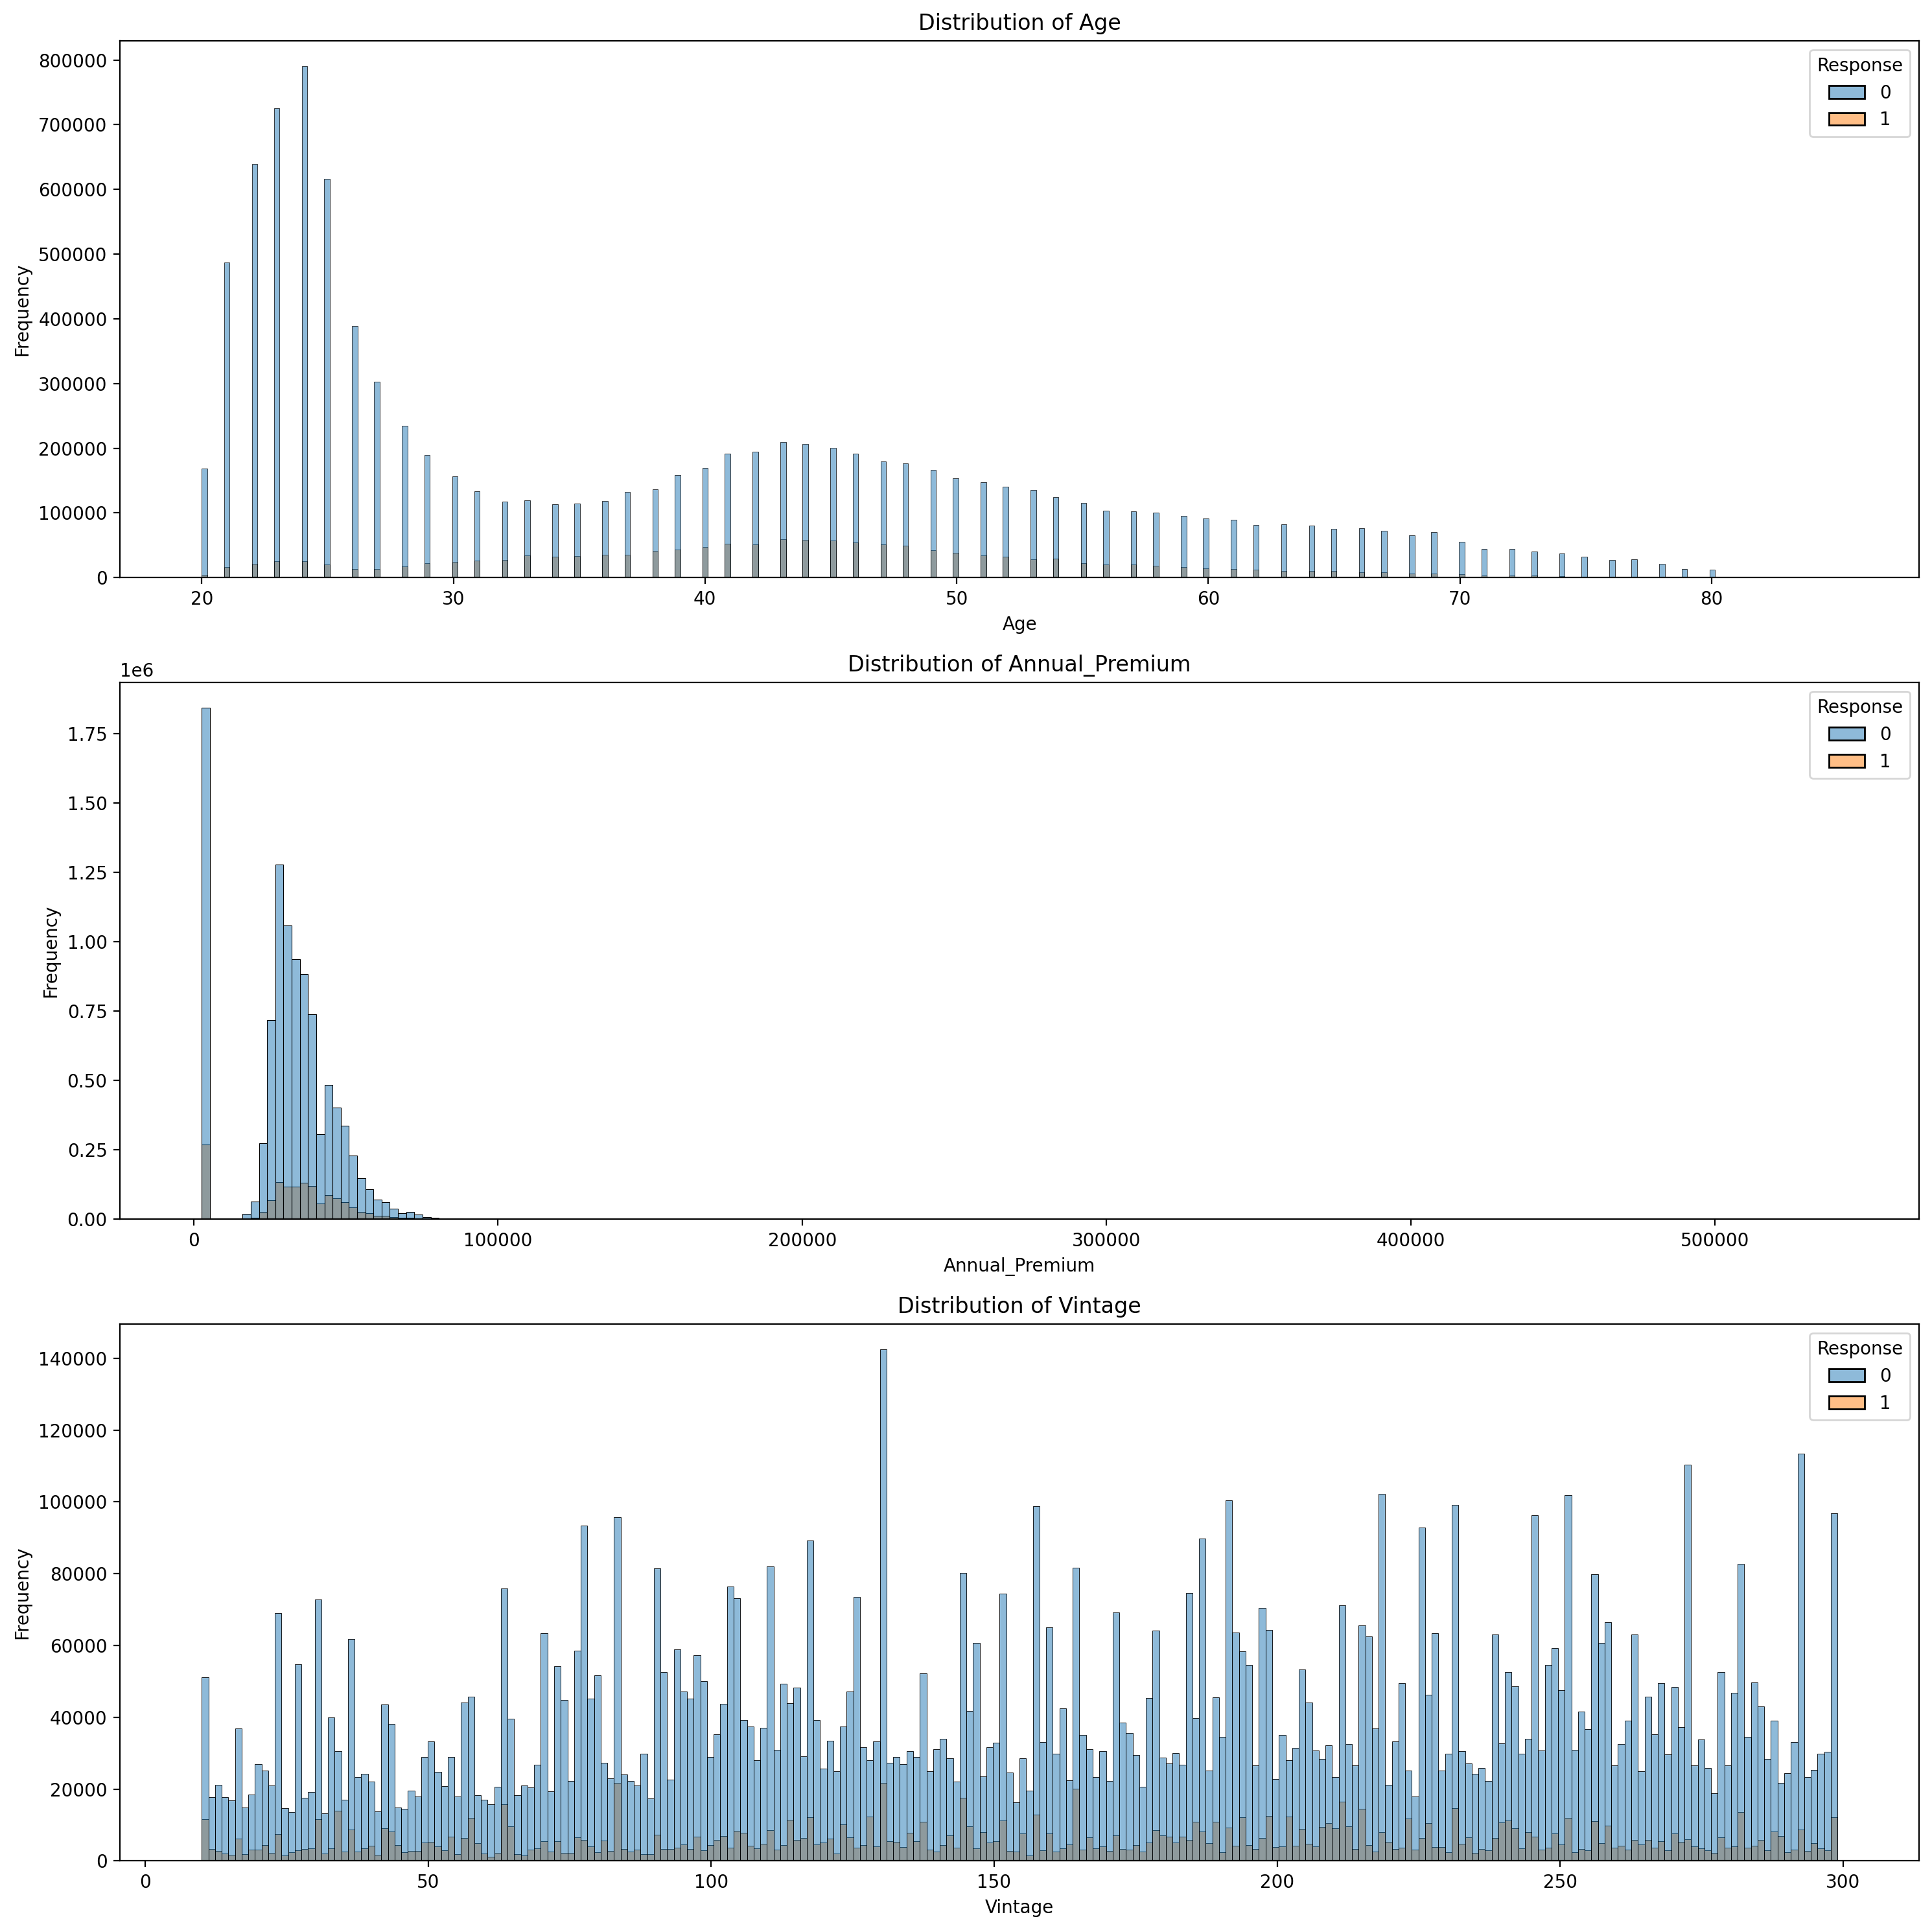

In [25]:
# Plot distributions for numeric columns
histogram_variables = {"Age": None, "Annual_Premium": 200, "Vintage": None}
n_cols = 1  # Number of columns for subplots
n_rows = len(histogram_variables) // n_cols + (len(histogram_variables) % n_cols > 0)  # Calculate rows based on total numeric cols

# Set the figure size based on the number of subplots
plt.figure(figsize=(15, 5 * n_rows))

# Loop through each numeric column and create a subplot
for i, col in enumerate(histogram_variables.items(), 1):  # Start indexing from 1
    plt.subplot(n_rows, n_cols, i)
    if col[1] is None:
        sns.histplot(x=col[0], hue="Response", data=df)
    else:
        sns.histplot(x=col[0], hue="Response", data=df, bins=col[1])  # You can use `kde=False` if you prefer only a histogram
    plt.title(f'Distribution of {col[0]}')
    plt.xlabel(col[0])
    plt.ylabel('Frequency')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

There is something fishy going on with the "Annual_Premium" variable. It has an atom around 0, more precisely between 2k and 3k:

<Axes: xlabel='Annual_Premium', ylabel='Count'>

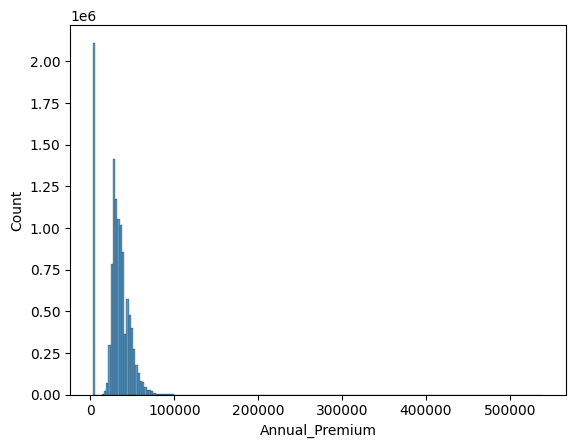

In [19]:
sns.histplot(df[df['Annual_Premium'] > 2000]['Annual_Premium'], bins = 200)

<Axes: xlabel='Annual_Premium', ylabel='Count'>

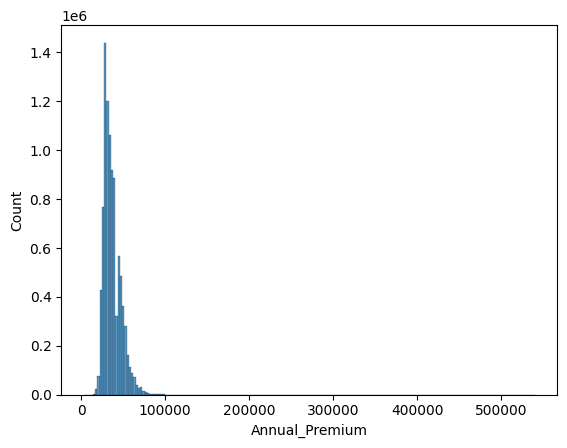

In [22]:
sns.histplot(df[df['Annual_Premium'] > 3000]['Annual_Premium'], bins = 200)

<Axes: xlabel='Annual_Premium', ylabel='Count'>

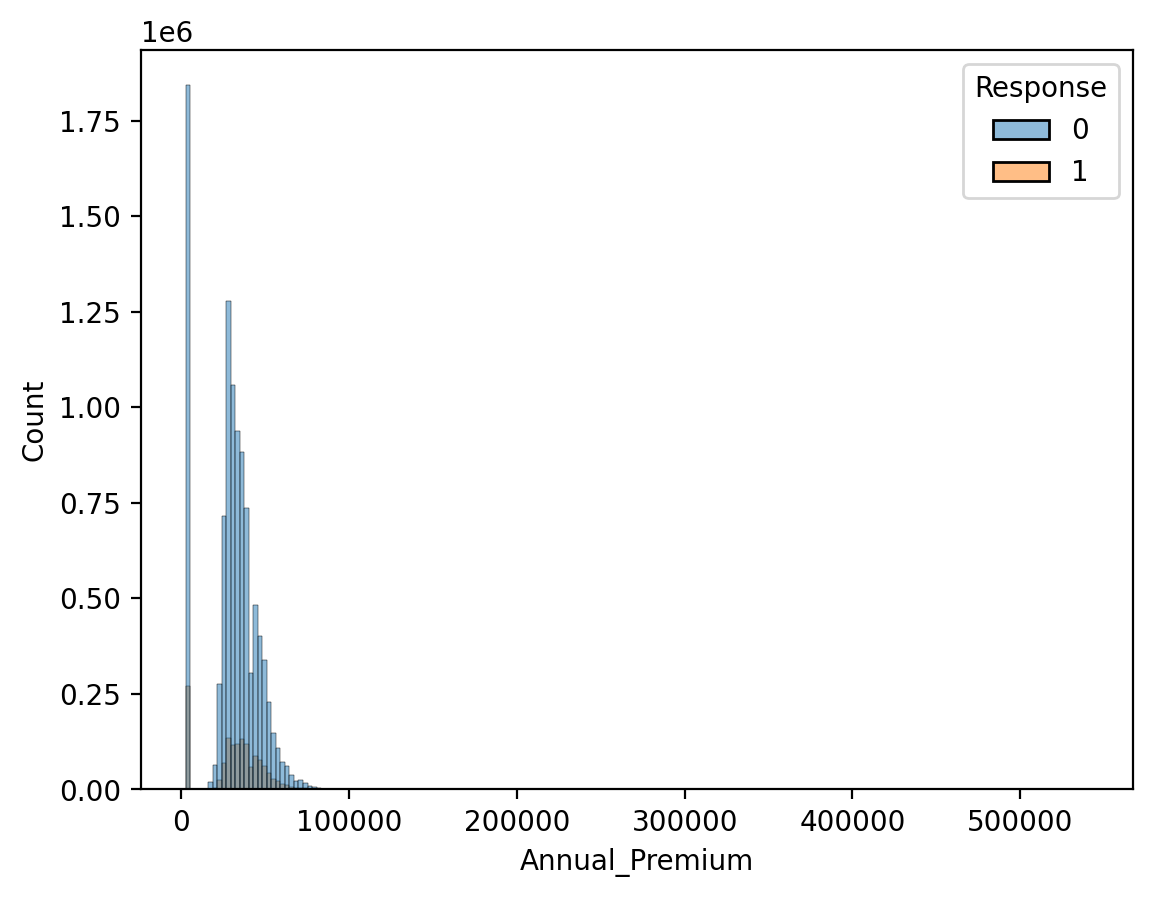

In [5]:
# The atom of the distribution remains even when grouping by target variable
sns.histplot(x="Annual_Premium", hue="Response", data=df[df['Annual_Premium'] > 2000], bins = 200)

Moreover, the distribution of Annual_Premium is heavily skewed to the right with heavy tails/outliers to be investigated separately. To bin this distribution we might need to use logarithmic binning.

<Axes: xlabel='Annual_Premium'>

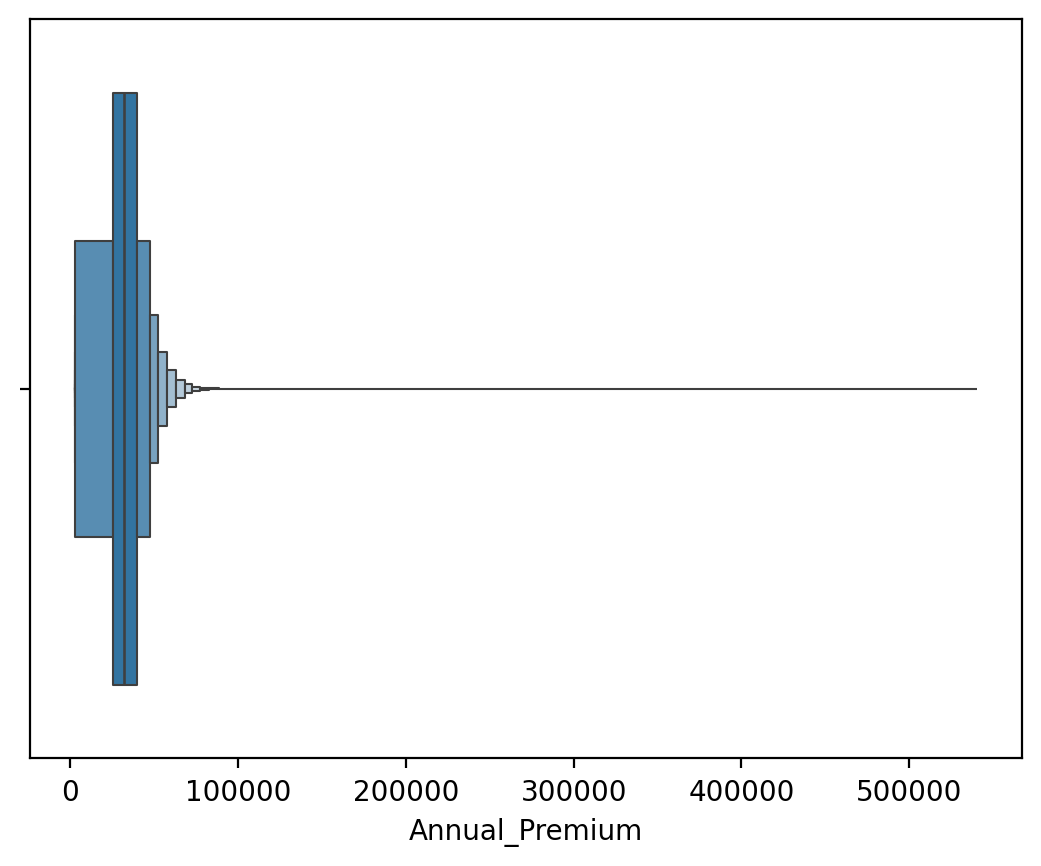

In [73]:
# boxplot of annual premium
sns.boxplot(x="Annual_Premium", data=df)

It's worth taking logs:

<Axes: xlabel='Log_Annual_Premium', ylabel='Count'>

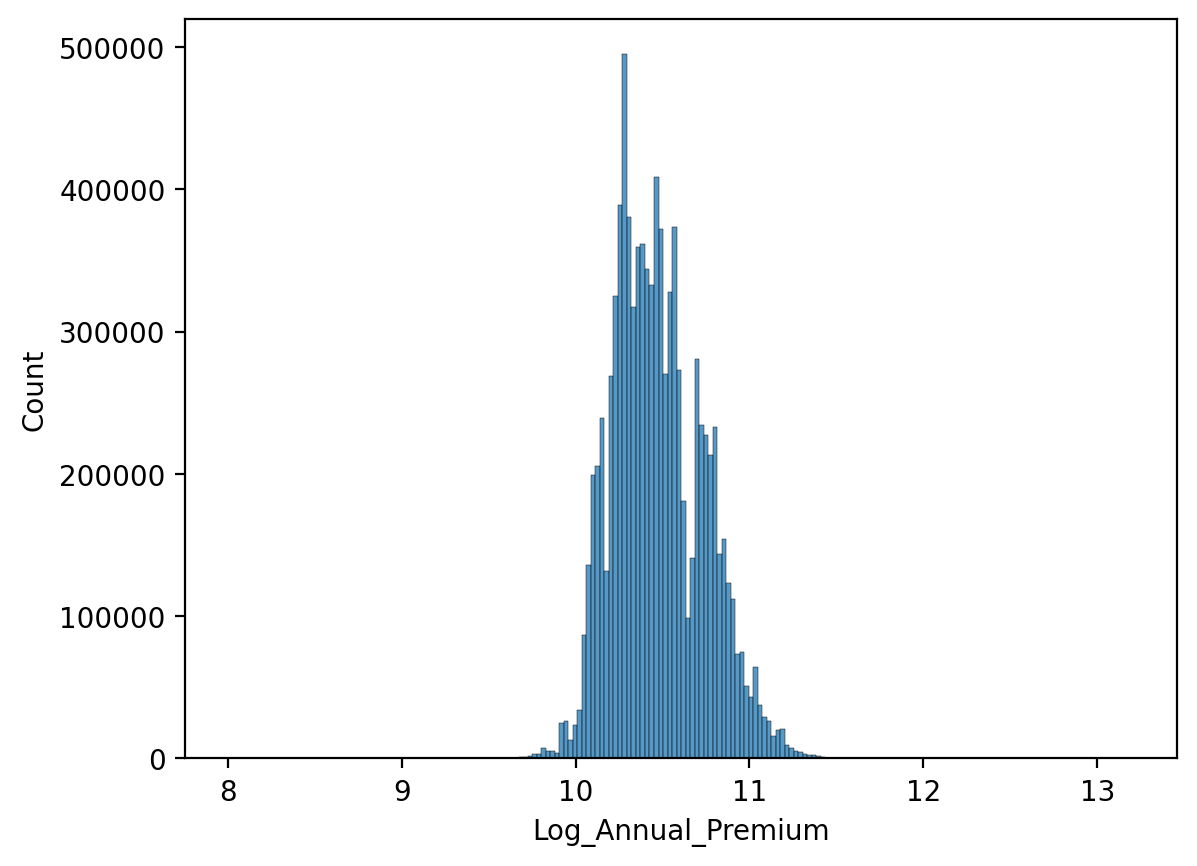

In [36]:
df['Log_Annual_Premium'] = np.log(df['Annual_Premium'])
sns.histplot(df[df['Annual_Premium'] > 3000]['Log_Annual_Premium'], bins = 200)

<Axes: xlabel='Log_Annual_Premium'>

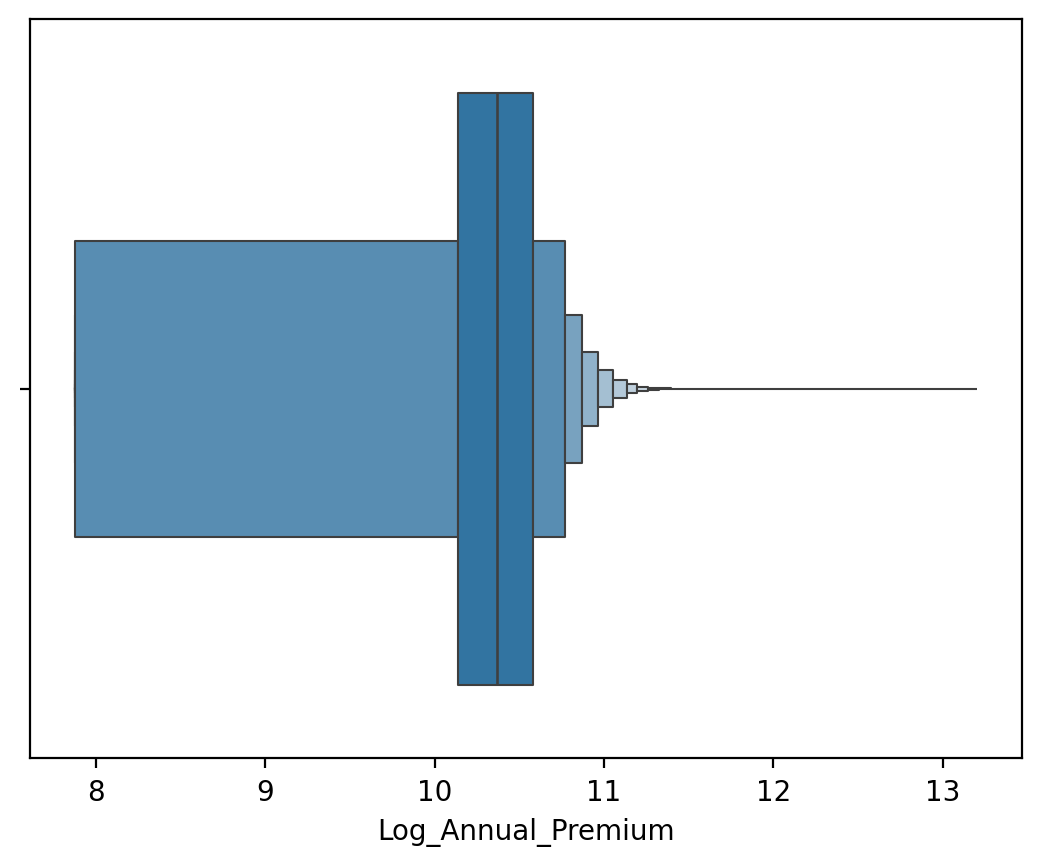

In [74]:
# boxplot of log annual premium
df['Log_Annual_Premium'] = np.log(df['Annual_Premium'])
sns.boxplot(x="Log_Annual_Premium", data=df)

And, since there still are very fat tails, display a plot with log bins:

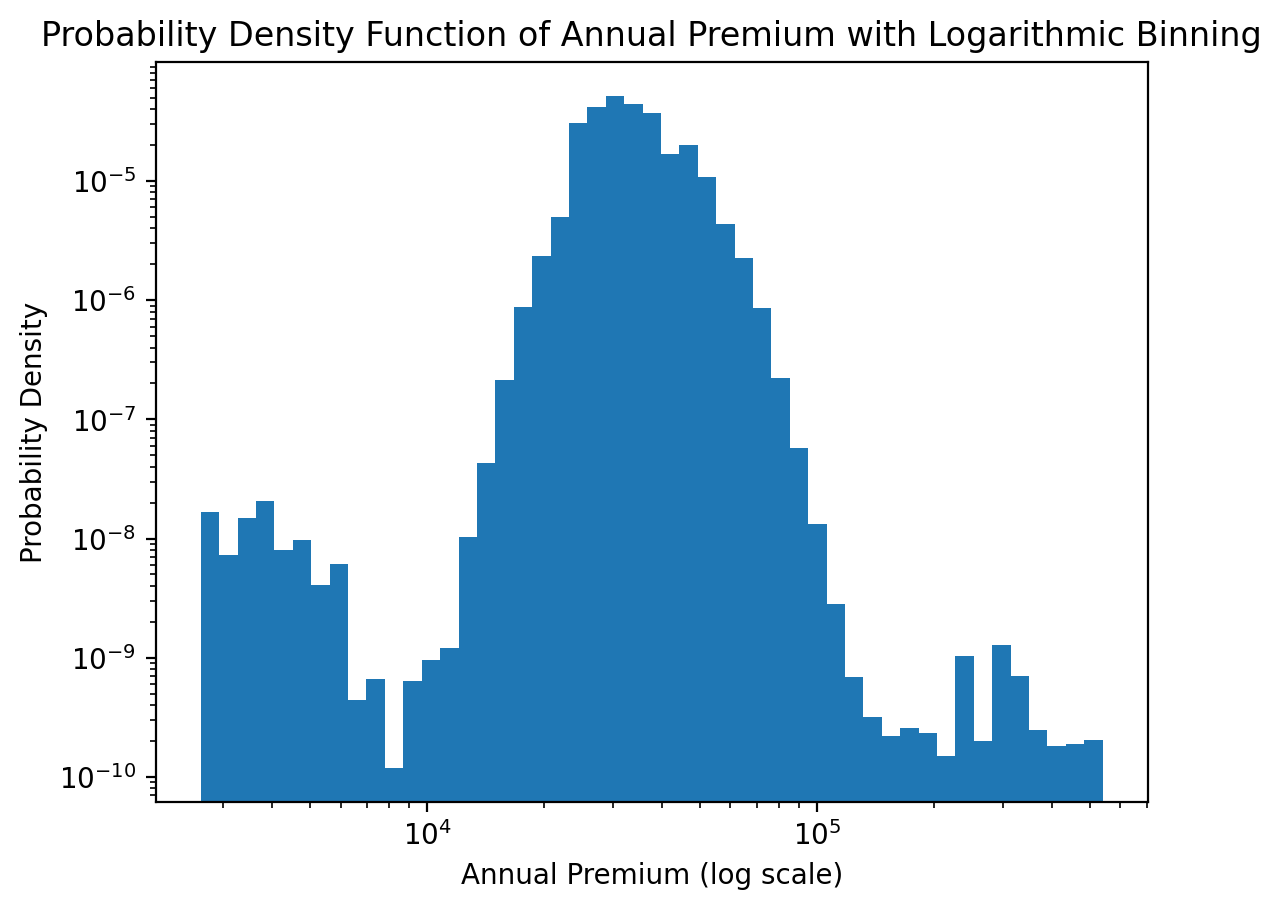

In [55]:
bins = np.logspace(np.log10(df['Annual_Premium'].min()), np.log10(df['Annual_Premium'].max()), 50)
plt.hist(df['Annual_Premium'], bins=bins, density=True, label='Annual Premium', log=True)

# Set logarithmic scale for the x-axis
plt.xscale('log', base = 10)

# Add labels and title
plt.xlabel('Annual Premium (log scale)')
plt.ylabel('Probability Density')
plt.title('Probability Density Function of Annual Premium with Logarithmic Binning')

plt.show()

The age variable seems to have different distributions when grouped by response.

<Axes: xlabel='count', ylabel='Age'>

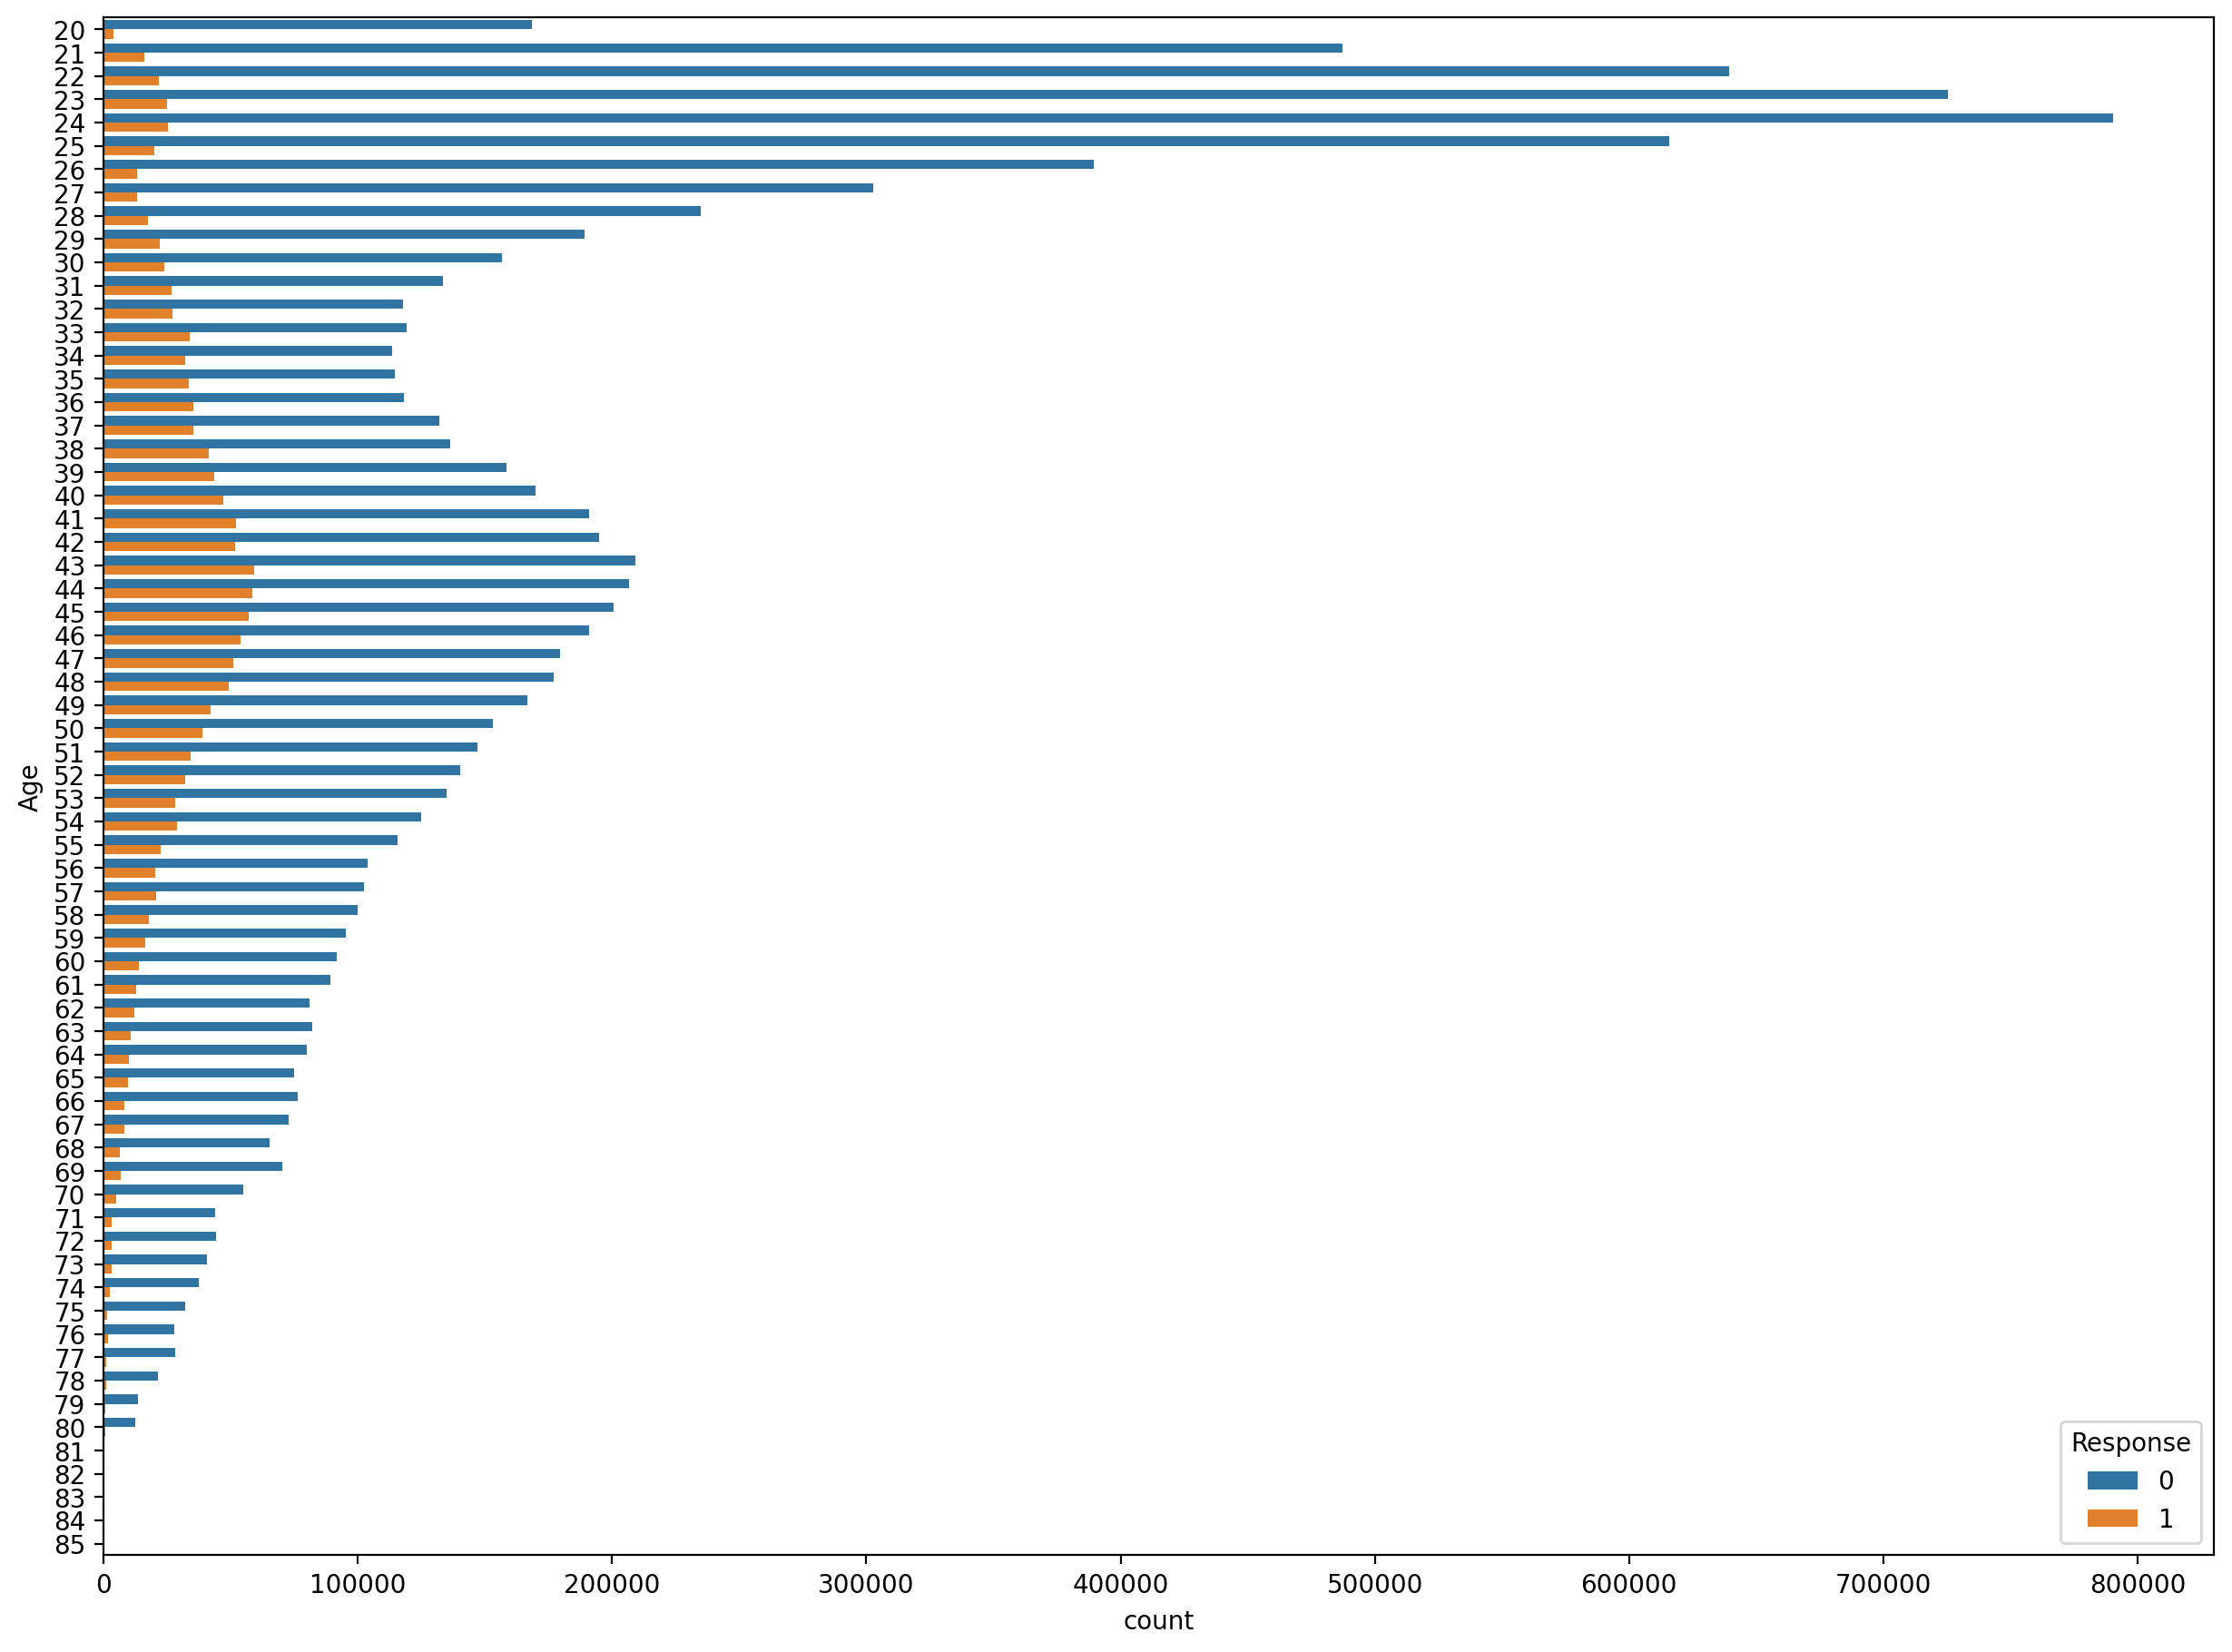

In [78]:
fig, ax = plt.subplots(figsize=(15, 11))
sns.countplot(y="Age", hue="Response", data=df)

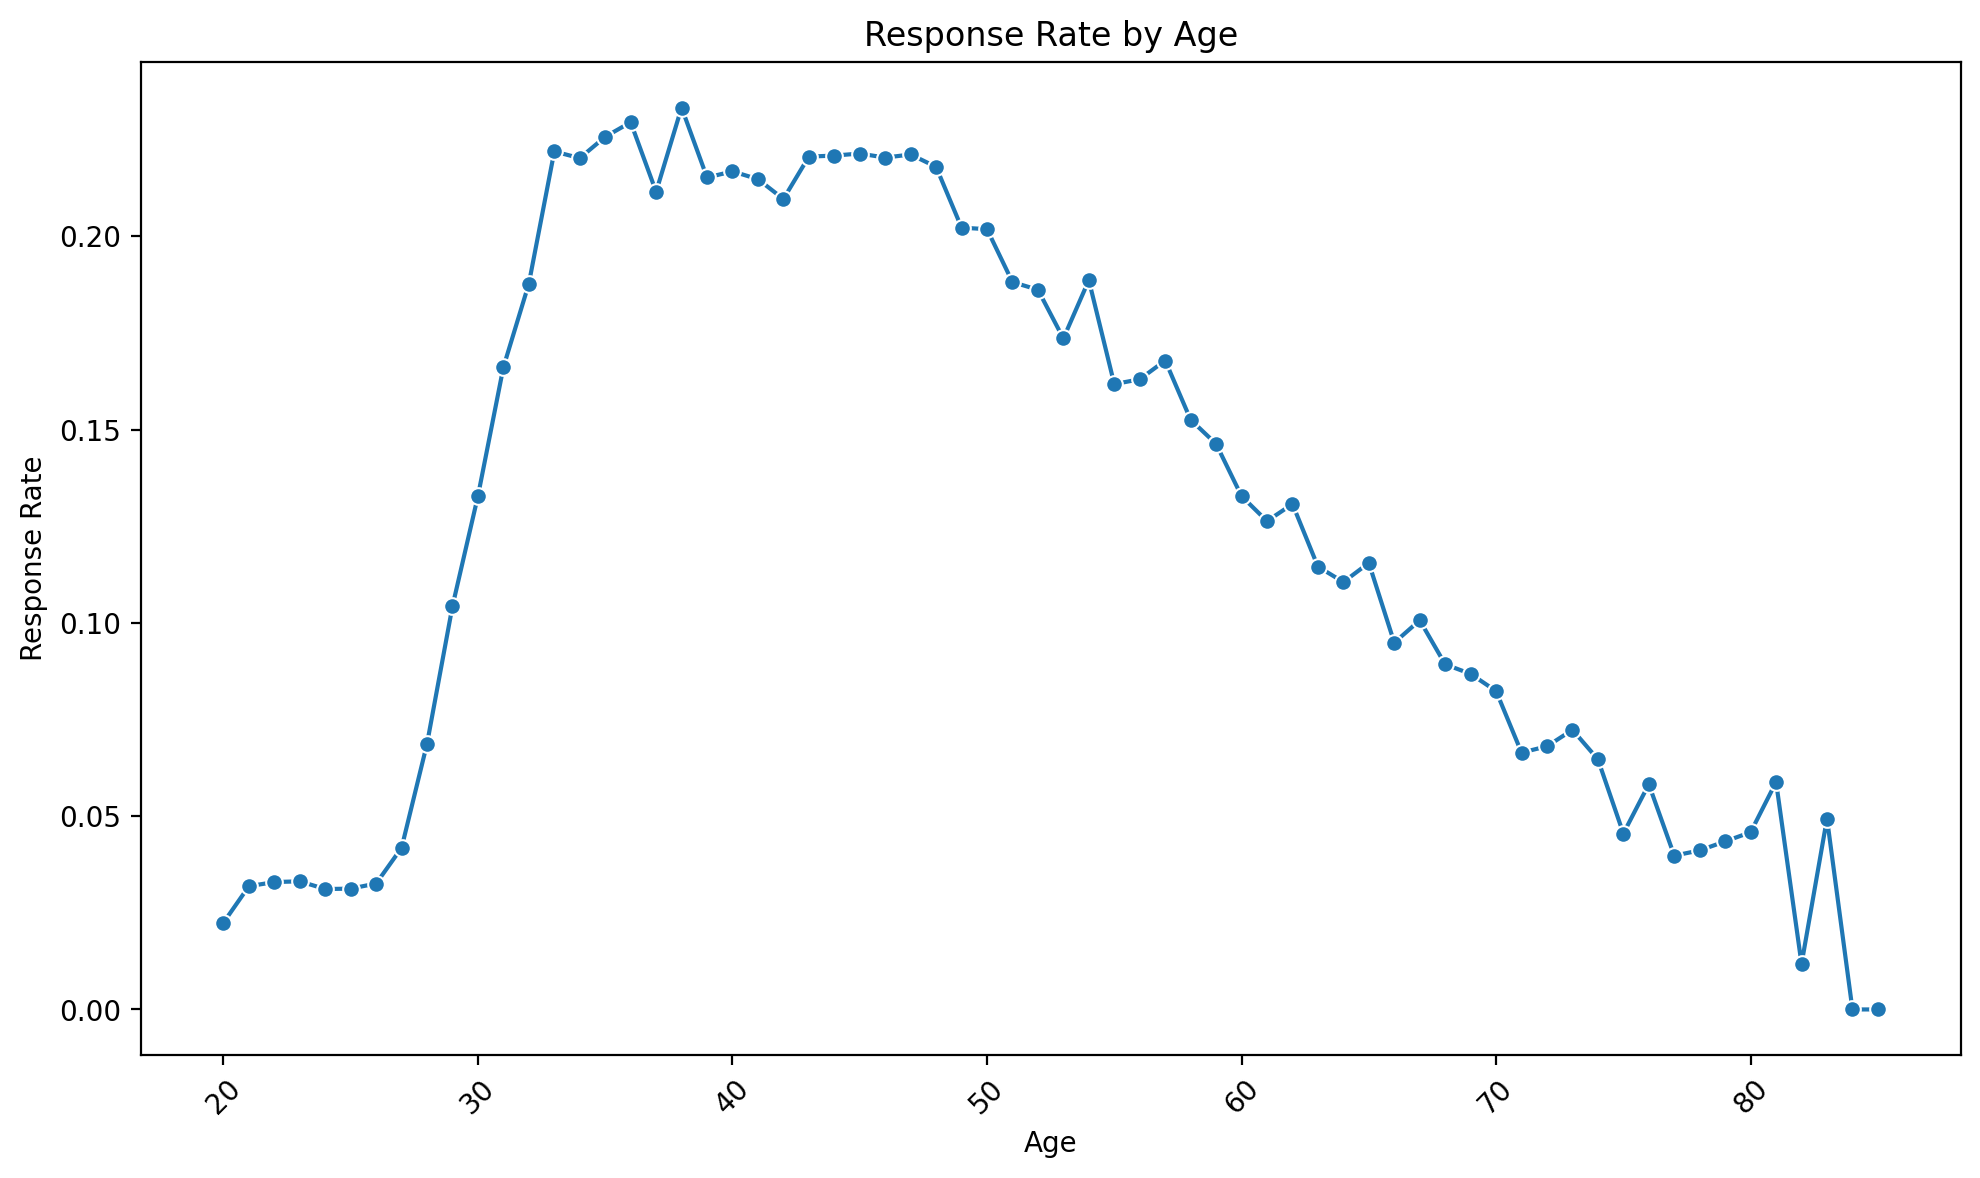

In [11]:
# Step 1: Calculate the response rate by Age
response_rate_by_age = df.groupby('Age')['Response'].mean().reset_index()

# Step 2: Plot the bar chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='Response', marker='o', data=response_rate_by_age)

# Step 3: Customize the plot
plt.title('Response Rate by Age')
plt.xlabel('Age')
plt.ylabel('Response Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels if there are many age groups
plt.tight_layout()

# Show the plot
plt.show()

The relationship is highly nonlinear. It might be useful to do some feature engineering and use a dummy of the kind "Age >= 35 " in model building. 

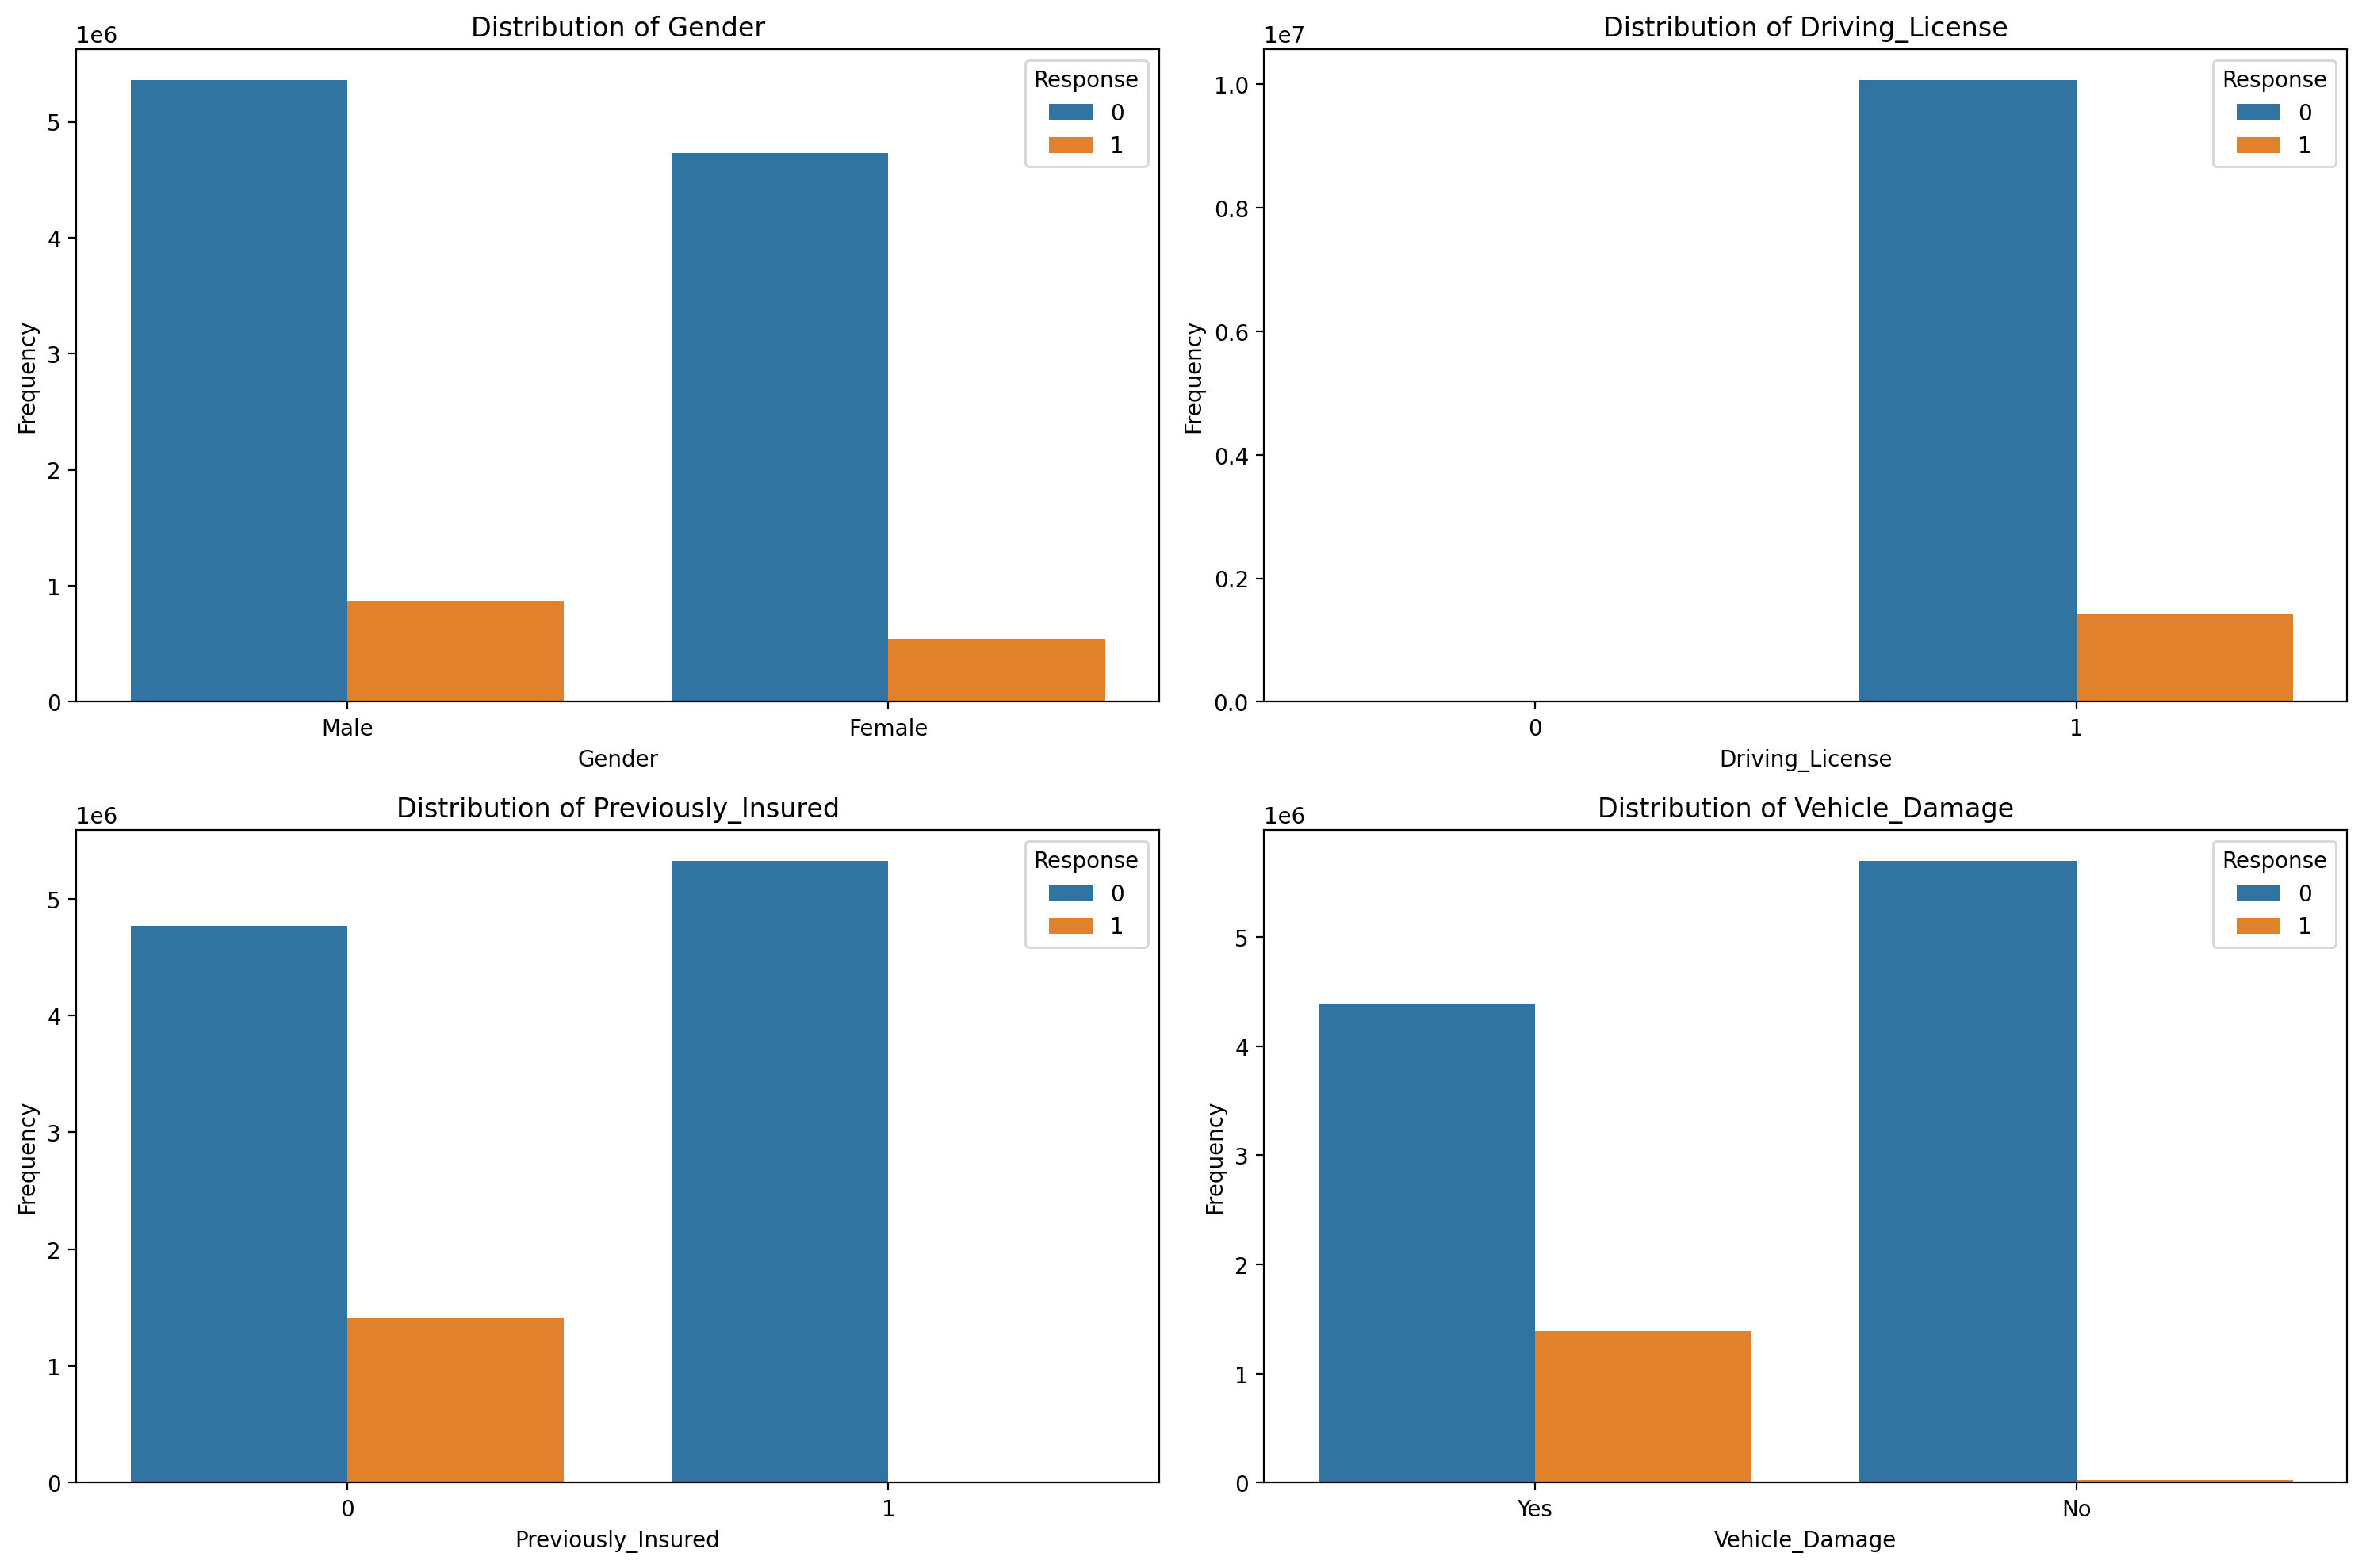

In [67]:
# bar plots of categorical variables
n_cols = 2  # Number of columns for subplots
n_rows = len(binary_cols) // n_cols + (len(binary_cols) % n_cols > 0)  

# Set the figure size based on the number of subplots
plt.figure(figsize=(15, 5 * n_rows))

# Loop through each column and create a subplot
for i, col in enumerate(binary_cols, 1):  # Start indexing from 1
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(x=col, hue="Response", data=df)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


Gender: it seems like males have slightly higher response rate:

In [72]:
pd.crosstab(df["Gender"], df["Response"], normalize = 'index')

Response,0,1
Gender,,
Female,0.90,0.10
Male,0.86,0.14


Driving_License: people with no driving license seem to be statistically irrelevant

Previously_Insured: customers with previous insurance almost never purchase insurance again. -> Very high churn

In [82]:
pd.crosstab(df["Previously_Insured"], df["Response"], normalize = 'index')

Response,0,1
Previously_Insured,,
0,0.772,2.285e-01
1,0.999,6.383e-04


Essentially only customers with damaged vehicles purchase insurance:

In [80]:
pd.crosstab(df["Vehicle_Damage"], df["Response"], normalize = 'index')

Response,0,1
Vehicle_Damage,,
No,1.00,4.20e-03
Yes,0.76,2.41e-01


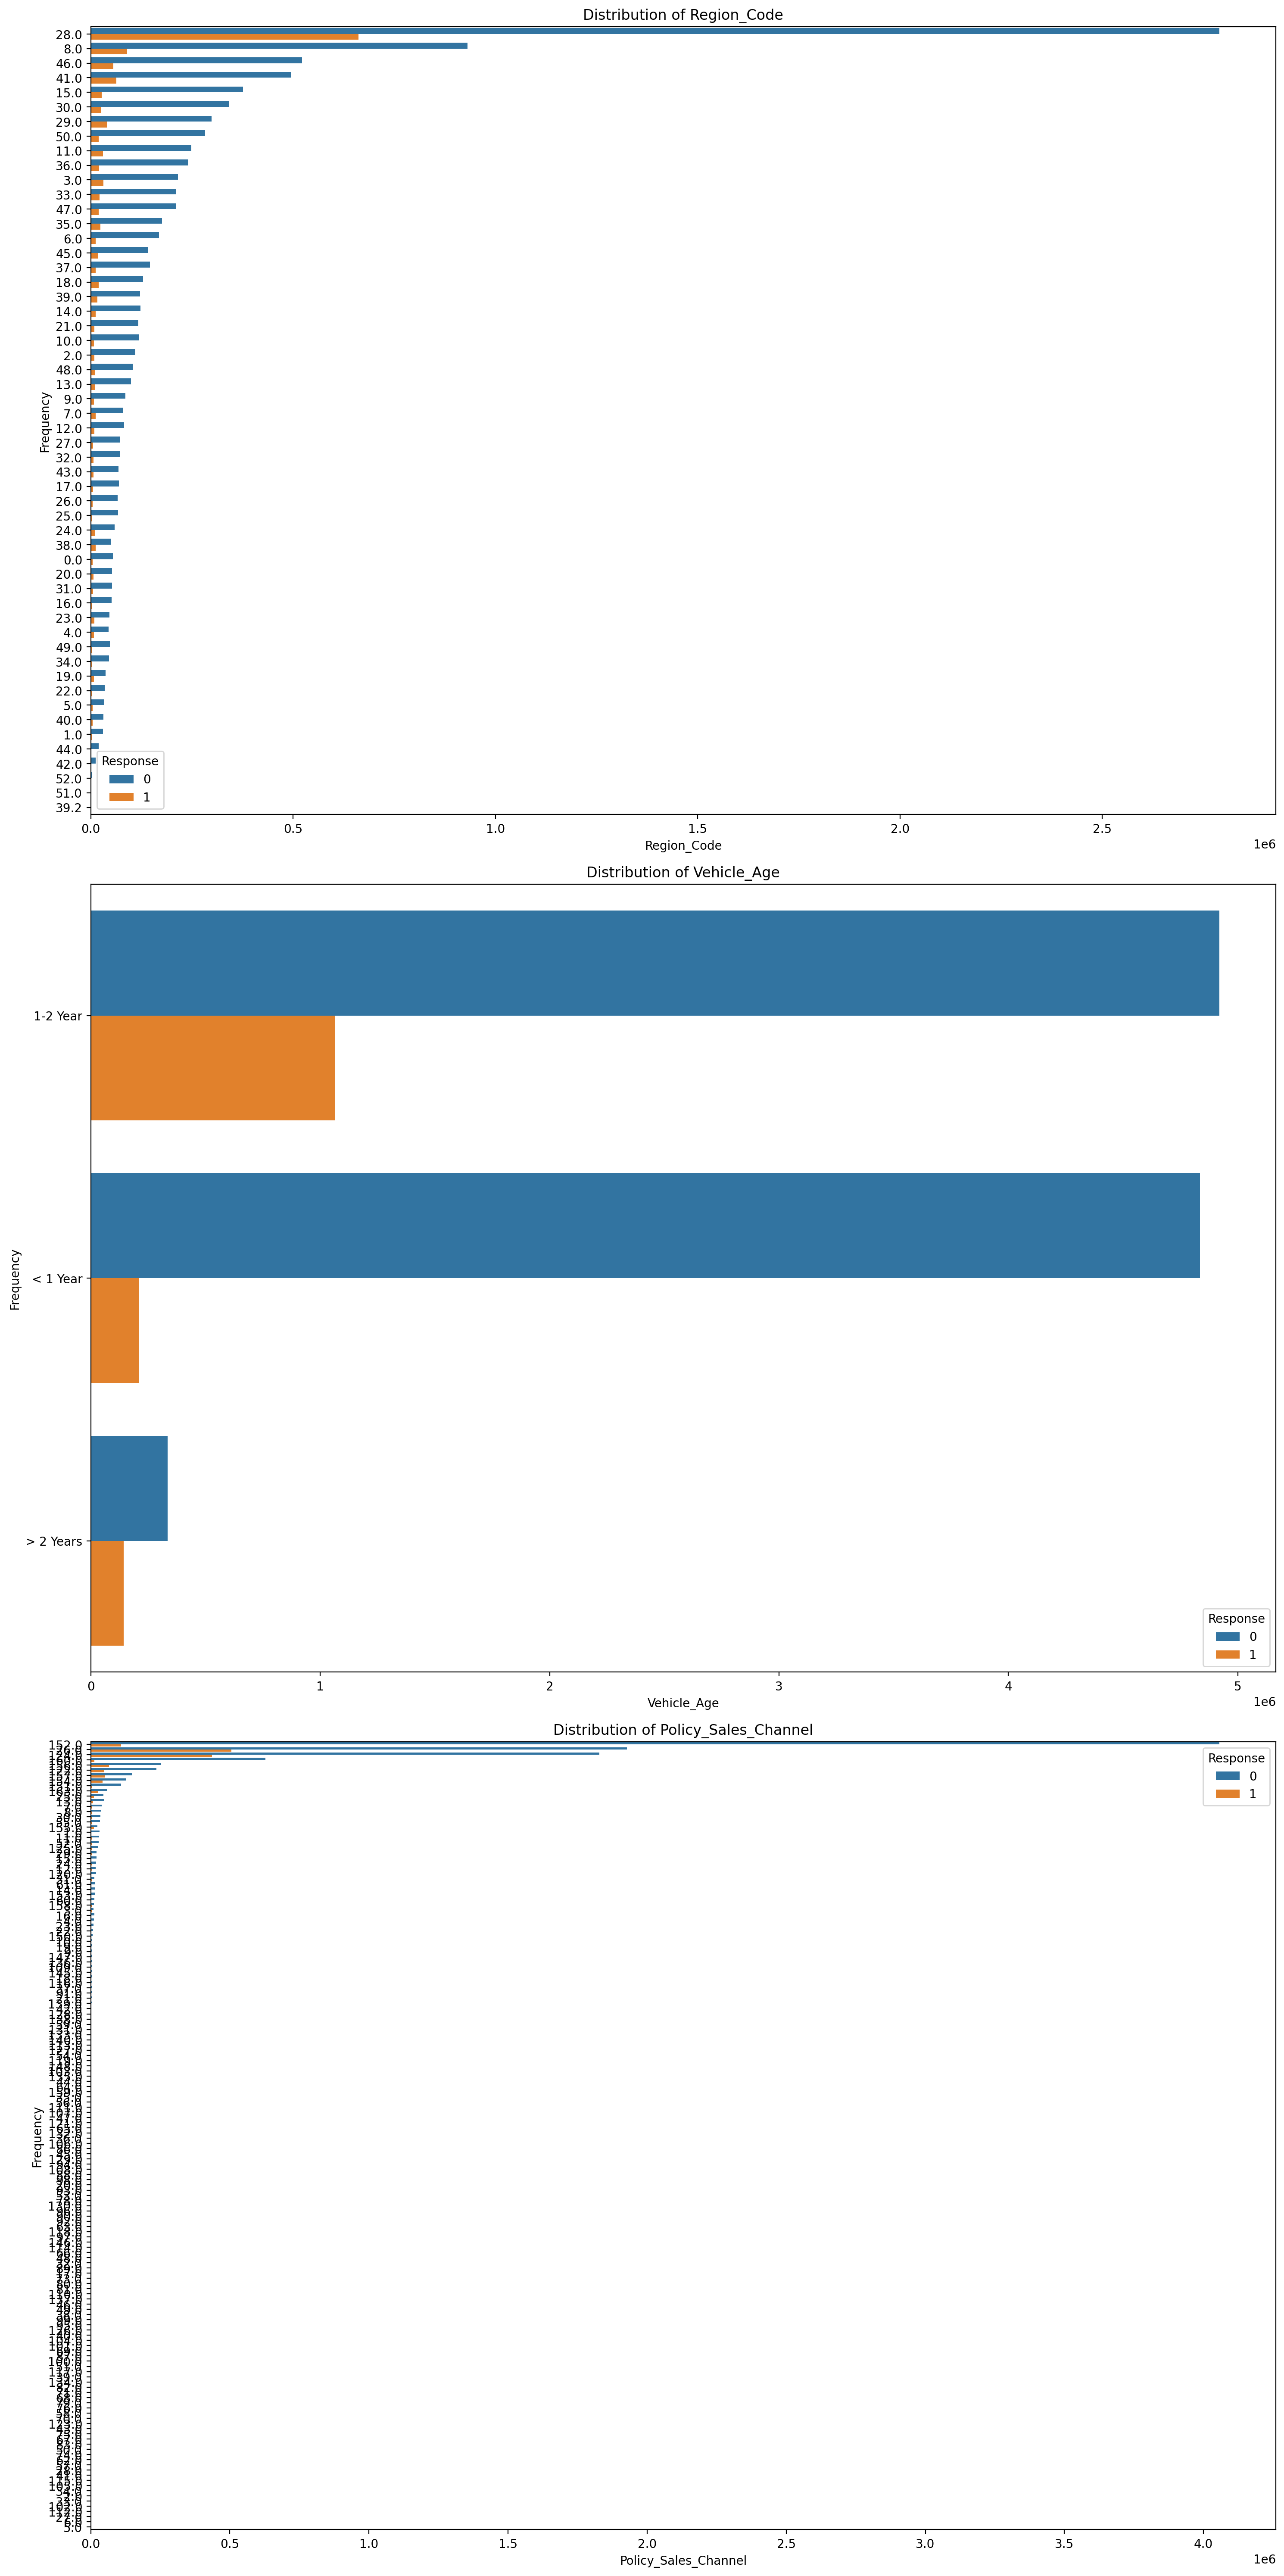

In [71]:
# bar plots of categorical variables
n_cols = 1  # Number of columns for subplots
n_rows = len(categorical_cols) // n_cols + (len(categorical_cols) % n_cols > 0)  

# Set the figure size based on the number of subplots
plt.figure(figsize=(15, 10 * n_rows))

# Loop through each column and create a subplot
for i, col in enumerate(categorical_cols, 1):  # Start indexing from 1
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(y=col, hue="Response", data=df, order = df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

Vehicle_Age: most customers have 1-2 y/o cars, but the insurance purchase rate increases quickly with car age:

In [88]:
pd.crosstab(df["Vehicle_Age"], df["Response"], normalize = 'index').sort_values(by = 1)

Response,0,1
Vehicle_Age,,
< 1 Year,0.959,0.041
1-2 Year,0.822,0.178
> 2 Years,0.701,0.299


Policy_Sales_Channel: most channels seem irrelevant:

In [145]:
# What regions purchase more insurance?

# Calculate the cross-tabulation with normalized values
cross_tab = pd.crosstab(df["Policy_Sales_Channel"], df["Response"], normalize='index')

# Add a column to show the count of observations by region
cross_tab['Count'] = df['Policy_Sales_Channel'].value_counts()

# sort by count
cross_tab = cross_tab.sort_values("Count", ascending=False)

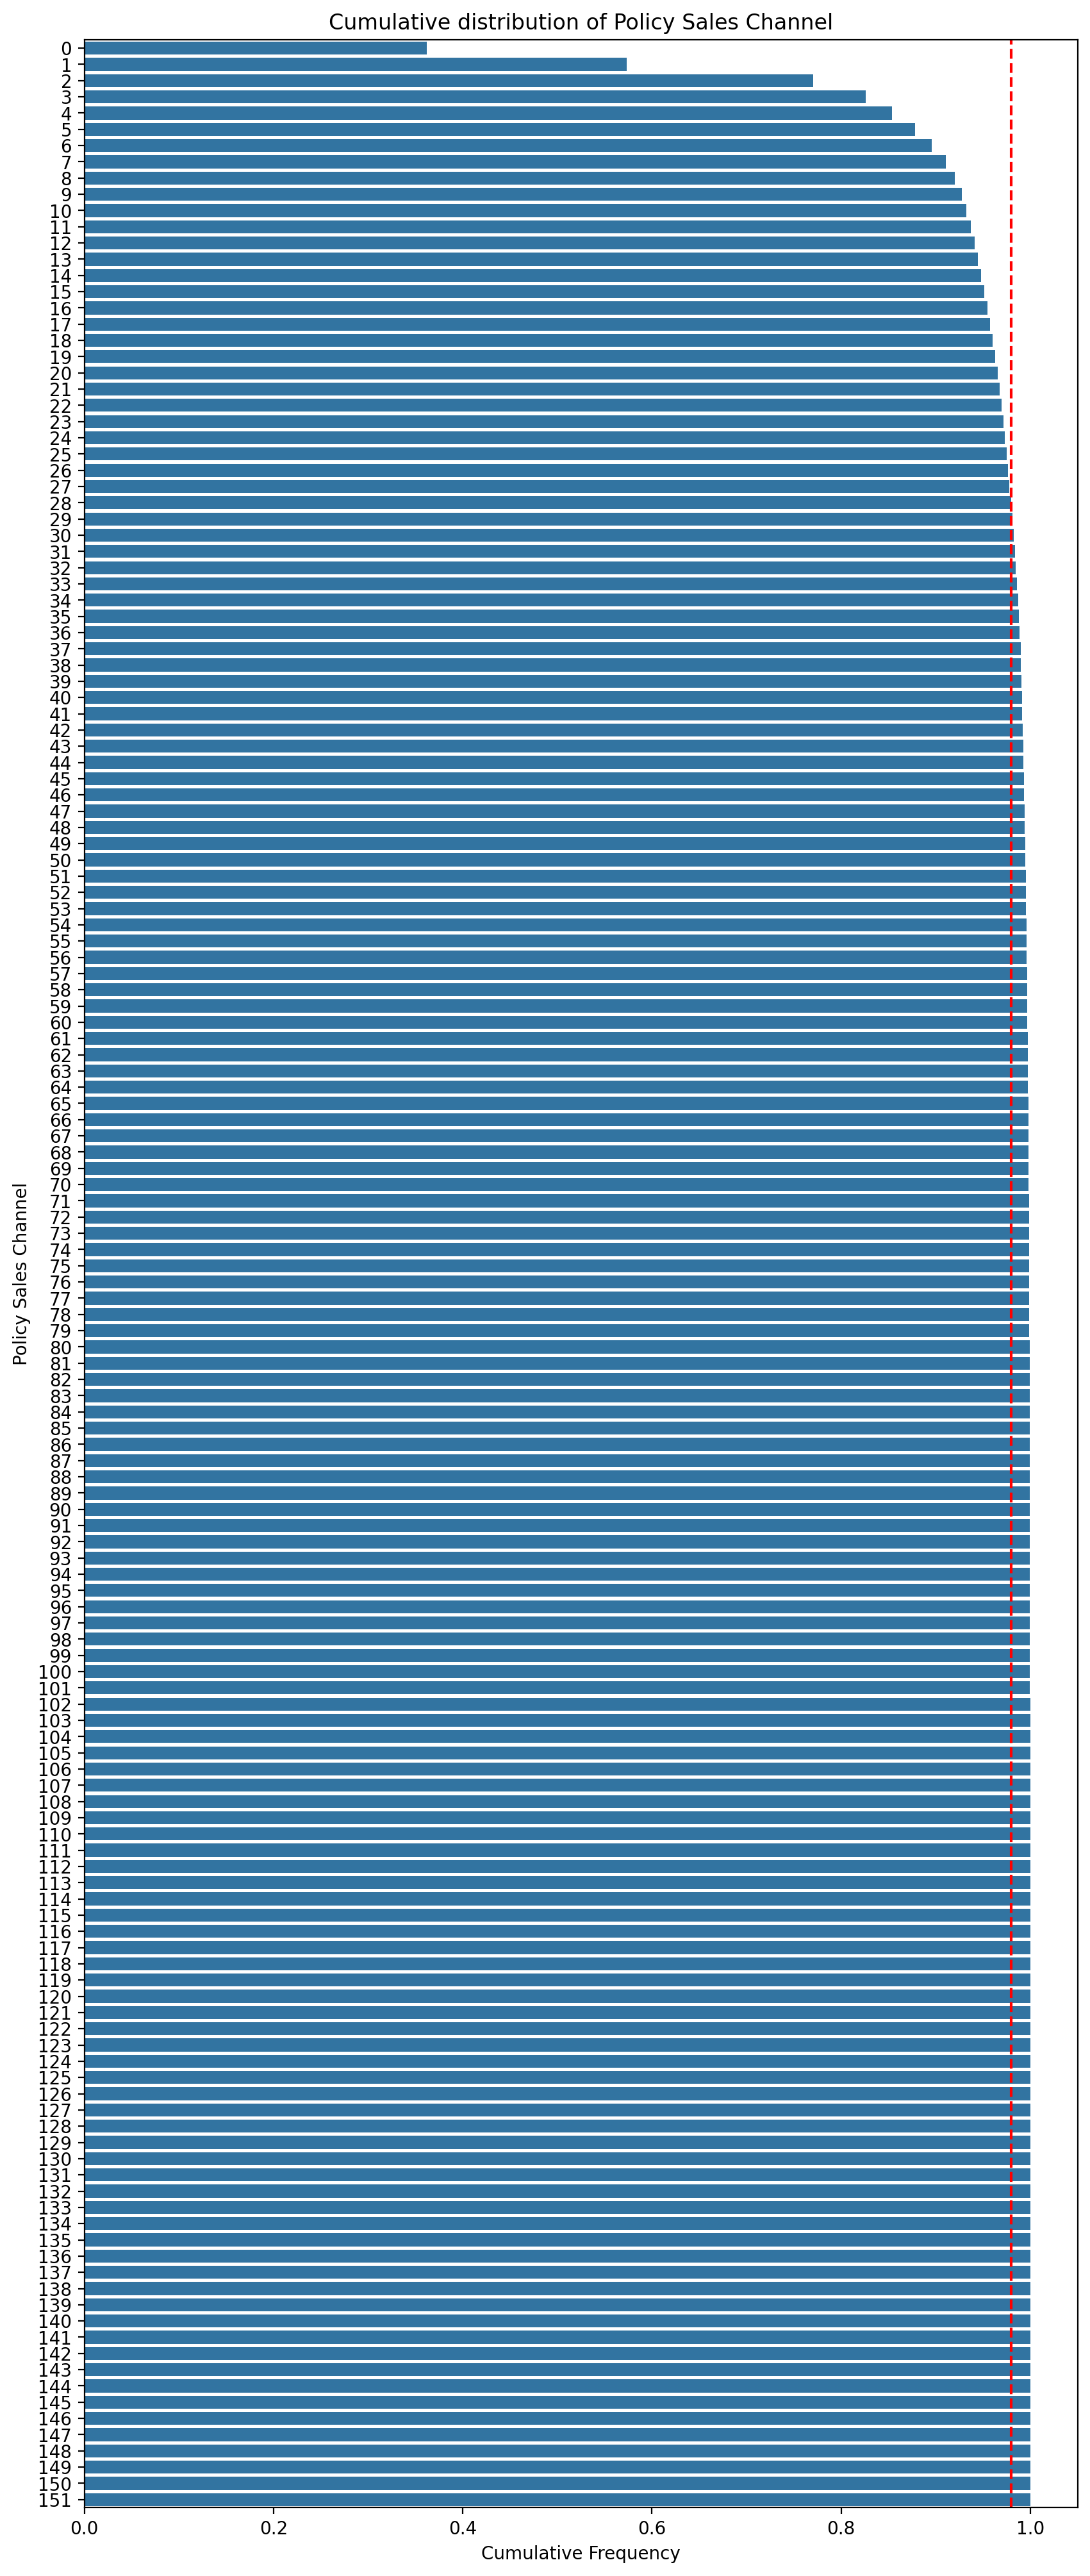

In [146]:
threshold = 0.98

# cumulative distribution plot
cross_tab['cumsum'] = cross_tab['Count'].cumsum()/cross_tab['Count'].sum()
cross_tab['order'] = cross_tab.reset_index().index
plt.figure(figsize=(10, 25))
sns.barplot(y='order', x='cumsum', orient='h', data=cross_tab)
#sns.lineplot(y='Policy_Sales_Channel', x='cumsum', data=cross_tab, orient='y')
plt.axvline(x=threshold, color='r', linestyle='--') 
plt.title(f'Cumulative distribution of Policy Sales Channel')
plt.xlabel('Cumulative Frequency')
plt.ylabel('Policy Sales Channel')

plt.show()


98% of all observations are within the top 28 values of Policy_Sales_Channel. We group the rest in an "other" category for a more meaningful distribution: 

In [142]:
channels_below_threshold = cross_tab[cross_tab['cumsum'] < threshold]['Policy_Sales_Channel'].values
df["Policy_Sales_Channel_Threshold"] = df["Policy_Sales_Channel"].apply(lambda x: x if x in channels_below_threshold else "Other")
df["Policy_Sales_Channel_Threshold"].value_counts()


0           124.0
1            26.0
2           152.0
3           156.0
4           152.0
            ...  
11504793     26.0
11504794    152.0
11504795    152.0
11504796     26.0
11504797    152.0
Name: Policy_Sales_Channel_Threshold, Length: 11504798, dtype: object

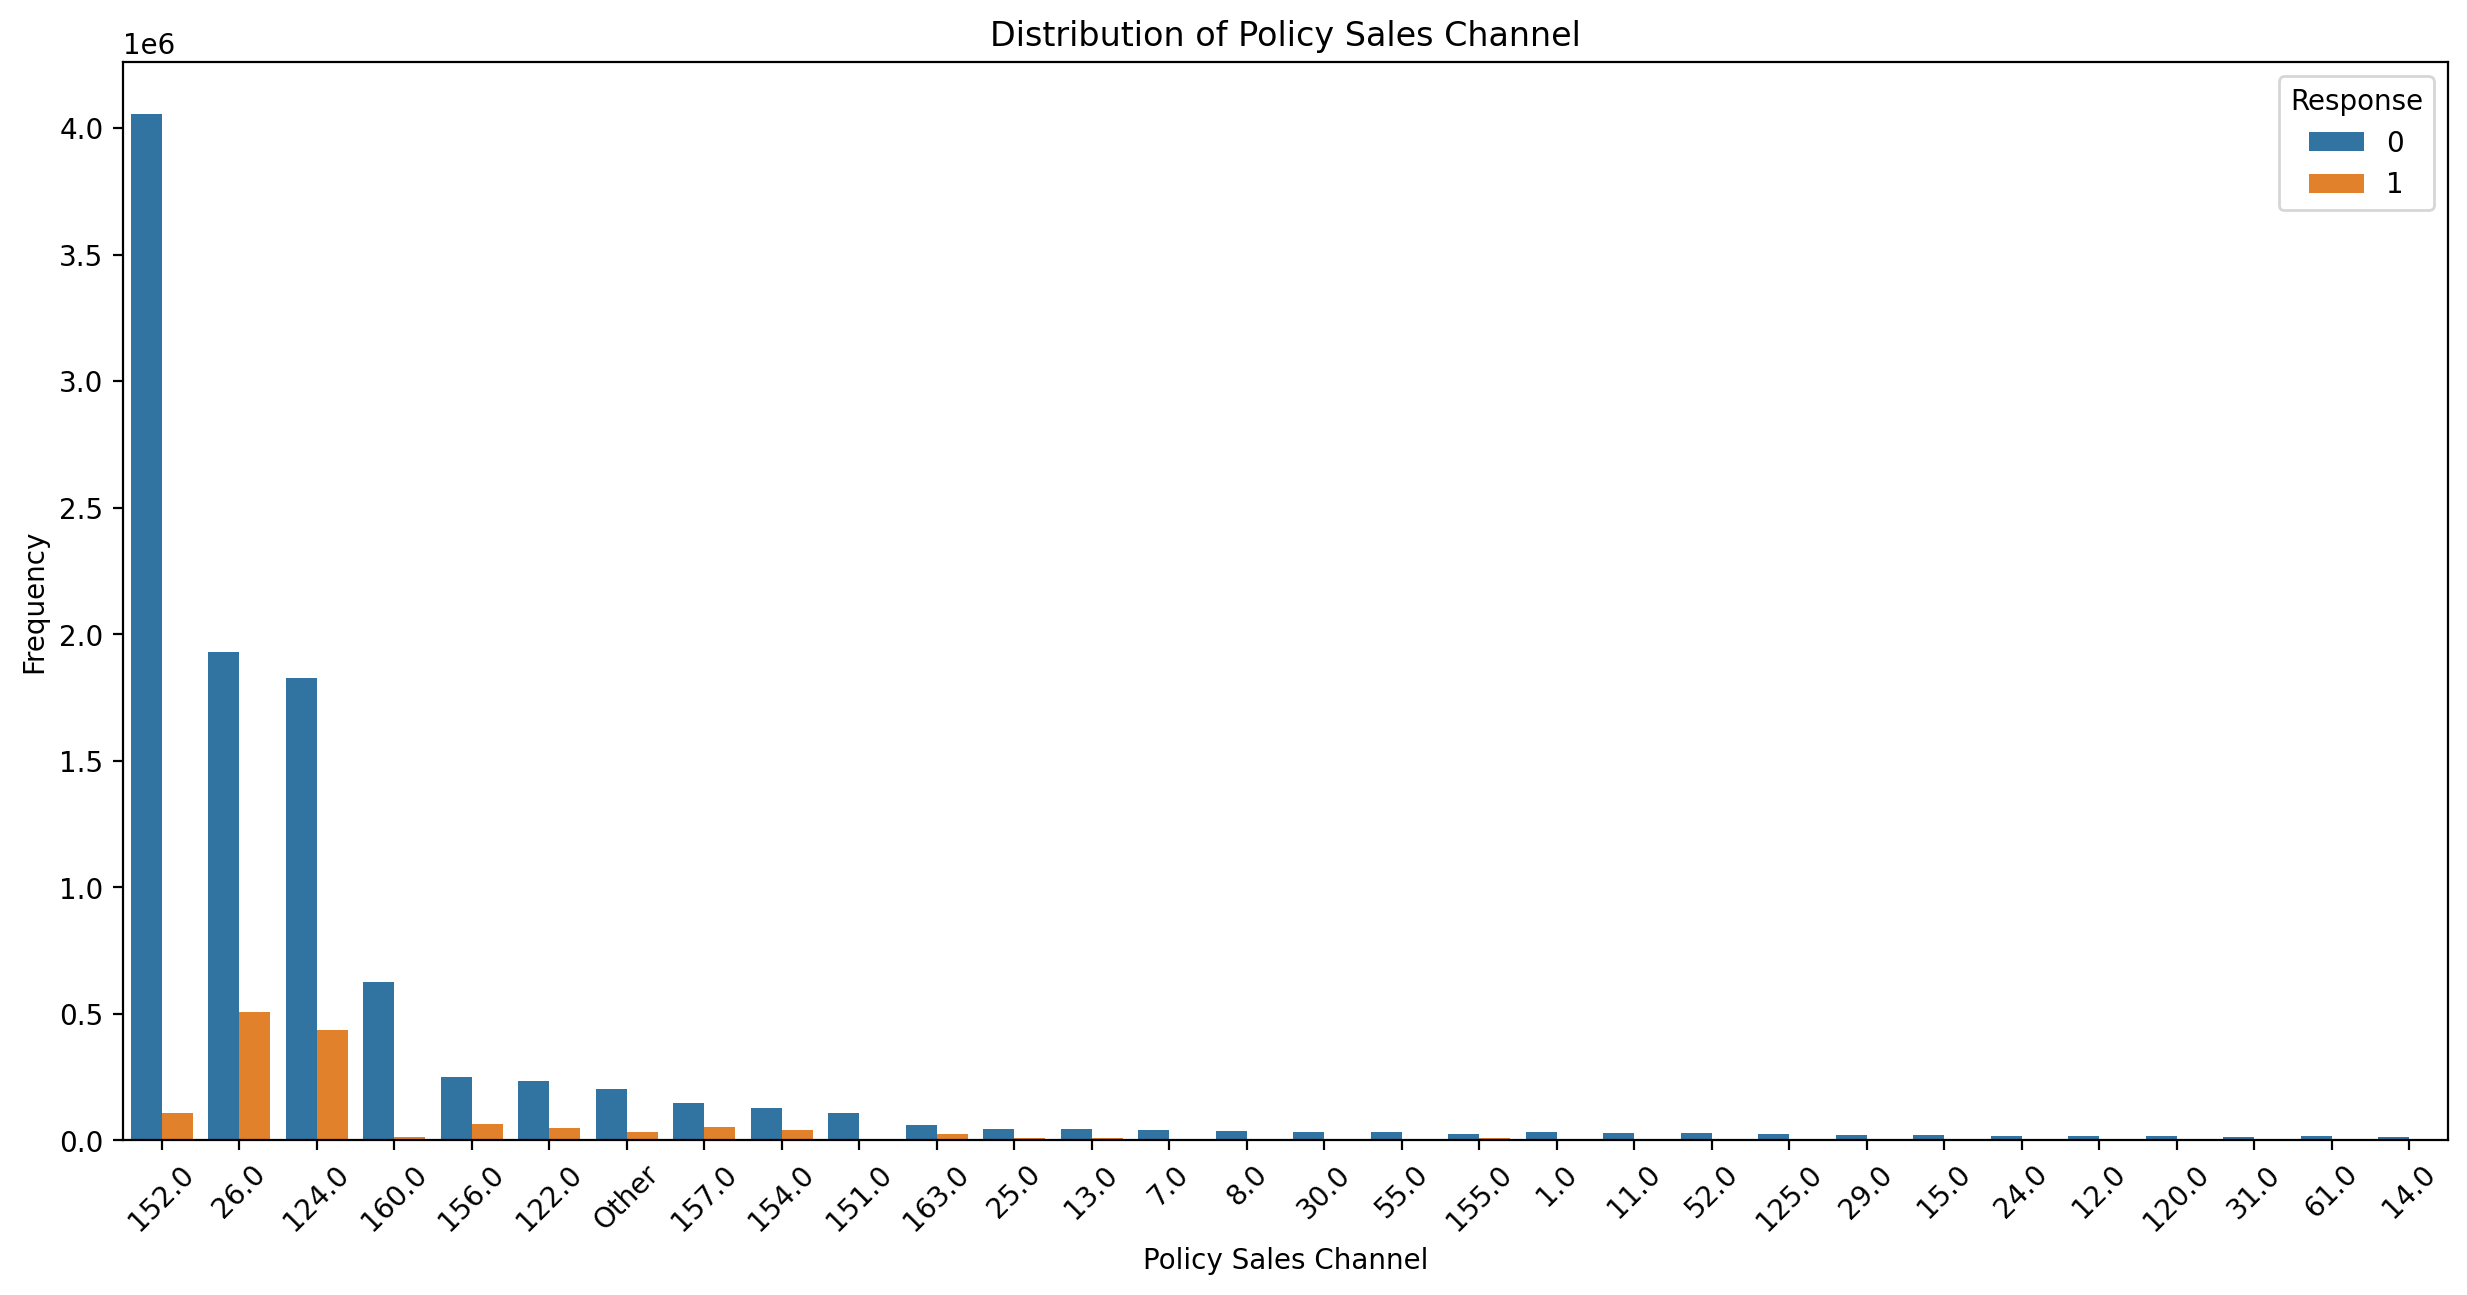

In [150]:
plt.figure(figsize=(15, 7))

sns.countplot(x="Policy_Sales_Channel_Threshold", hue="Response", data=df, order = df["Policy_Sales_Channel_Threshold"].value_counts().index)
plt.title(f'Distribution of Policy Sales Channel')
plt.xticks(rotation=45)
plt.xlabel("Policy Sales Channel")
plt.ylabel('Frequency')

plt.show()

To do: 
1. Heatmaps for correlations between numeric variables (check for multicollinearity)
2. Summary of EDA